In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv


In [64]:
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [65]:
df = pd.read_csv('/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv')

In [66]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757136,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
757137,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
757138,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
757139,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [67]:
df['LAT'].nunique()

5391

In [68]:
df['LON'].nunique()

4965

In [69]:
df["AREA"].nunique()


21

In [70]:
df['AREA NAME'].nunique()

21

In [71]:
df['Rpt Dist No'].nunique()

1199

In [72]:
columns_to_keep = [
    'LAT',
    'LON',
    'DATE OCC',
    'TIME OCC',
    'Crm Cd Desc',
    'AREA NAME'
]

# simplified DataFrame
df_clean = df[columns_to_keep]

# remove rows with missing coordinates
df_clean = df_clean.dropna(subset=['LAT', 'LON'])

# removing placeholder 0,0 coordinates
df_clean = df_clean[df_clean['LAT'] != 0]

df_clean.head()

,LAT,LON,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME
0,34.0141,-118.2978,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,Southwest
1,34.0459,-118.2545,01/01/2020 12:00:00 AM,330,BATTERY - SIMPLE ASSAULT,Central
2,34.0448,-118.2474,02/13/2020 12:00:00 AM,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,Central
3,34.1685,-118.4019,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),N Hollywood
4,34.2198,-118.4468,01/01/2020 12:00:00 AM,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Mission


In [73]:
# The most comprehensive mapping dictionary to date
crime_category_map = {
    # --- Theft ---
    'VEHICLE - STOLEN': 'Theft',
    'BURGLARY FROM VEHICLE': 'Theft',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft',
    'BIKE - STOLEN': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'THEFT OF IDENTITY': 'Theft',
    'PICKPOCKET': 'Theft',
    'PURSE SNATCHING': 'Theft',
    'SHOPLIFTING - GRAND THEFT ($950.01 & OVER)': 'Theft',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft',
    'PICKPOCKET, ATTEMPT': 'Theft',
    'GRAND THEFT / AUTO REPAIR': 'Theft',
    'DISHONEST EMPLOYEE - PETTY THEFT': 'Theft',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'Theft',
    'BUNCO, GRAND THEFT': 'Theft',
    'THEFT, PERSON': 'Theft',
    'BIKE - ATTEMPTED STOLEN': 'Theft',
    'THEFT, COIN MACHINE - ATTEMPT': 'Theft',
    'GRAND THEFT / INSURANCE FRAUD': 'Theft',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Theft',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Theft',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Theft',
    'VEHICLE - ATTEMPT STOLEN': 'Theft',
    'PETTY THEFT - AUTO REPAIR': 'Theft',
    'BUNCO, PETTY THEFT': 'Theft',
    'PURSE SNATCHING - ATTEMPT': 'Theft',
    'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Theft',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Theft',
    'DOCUMENT WORTHLESS ($200 & UNDER)': 'Theft',
    'TILL TAP - PETTY ($950 & UNDER)': 'Theft',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Theft',
    'THEFT PLAIN - ATTEMPT': 'Theft',
    'BUNCO, ATTEMPT': 'Theft',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'Theft',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Theft',
    'COUNTERFEIT': 'Theft',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Theft',
    'BOAT - STOLEN': 'Theft',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Theft',
    'THEFT FROM PERSON - ATTEMPT': 'Theft',
    'SHOPLIFTING - ATTEMPT': 'Theft',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'Theft',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Theft',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Theft',
    'DISHONEST EMPLOYEE - GRAND THEFT': 'Theft',
    'DRUNK ROLL': 'Theft',

    # --- Property Crimes ---
    'BURGLARY': 'Property Crimes',
    'BURGLARY, ATTEMPTED': 'Property Crimes',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Property Crimes',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Property Crimes',
    'VANDALISM - MISDEMEANOR ($399 OR UNDER)': 'Property Crimes',
    'TRESPASSING': 'Property Crimes',
    'ARSON': 'Property Crimes',
    'TELEPHONE PROPERTY - DAMAGE': 'Property Crimes',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Property Crimes',
    'UNAUTHORIZED COMPUTER ACCESS': 'Property Crimes',


    # --- Assault ---
    'BATTERY - SIMPLE ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Assault',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault',
    'BATTERY WITH SEXUAL CONTACT': 'Assault',
    'BATTERY ON A FIREFIGHTER': 'Assault',
    'BATTERY POLICE (SIMPLE)': 'Assault',
    'CHILD ABUSE (SIMPLE)': 'Assault',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Assault',
    'OTHER ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Assault',

    # --- Violent Crimes ---
    'ROBBERY': 'Violent Crimes',
    'ATTEMPTED ROBBERY': 'Violent Crimes',
    'HOMICIDE': 'Violent Crimes',
    'CRIMINAL HOMICIDE': 'Violent Crimes',
    'MANSLAUGHTER, NEGLIGENT': 'Violent Crimes',
    'RAPE, FORCIBLE': 'Violent Crimes',
    'KIDNAPPING': 'Violent Crimes',
    'BRANDISH WEAPON': 'Violent Crimes',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Violent Crimes',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Violent Crimes',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Violent Crimes',
    'EXTORTION': 'Violent Crimes',
    'SHOTS FIRED AT INHABITED DWELLING': 'Violent Crimes',
    'LYNCHING - ATTEMPTED': 'Violent Crimes',
    'LYNCHING': 'Violent Crimes',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Violent Crimes',
    'CHILD ABANDONMENT': 'Violent Crimes',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Violent Crimes',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Violent Crimes',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'Violent Crimes',
    'ORAL COPULATION': 'Violent Crimes',
    'STALKING': 'Violent Crimes',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Violent Crimes',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Violent Crimes',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Violent Crimes',
    'CHILD STEALING': 'Violent Crimes',
    'FALSE IMPRISONMENT': 'Violent Crimes',
    'RAPE, ATTEMPTED': 'Violent Crimes',
    'CHILD PORNOGRAPHY': 'Violent Crimes',
    'KIDNAPPING - GRAND ATTEMPT': 'Violent Crimes',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Violent Crimes',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Violent Crimes',
    'WEAPONS POSSESSION/BOMBING': 'Violent Crimes',


    # --- Other ---
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Other',
    'VIOLATION OF RESTRAINING ORDER': 'Other',
    'VIOLATION OF COURT ORDER': 'Other',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Other',
    'THROWING OBJECT AT MOVING VEHICLE': 'Other',
    'BOMB SCARE': 'Other',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Other',
    'FAILURE TO DISPERSE': 'Other',
    'INCITING A RIOT': 'Other',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'BIGAMY': 'Other',
    'BLOCKING DOOR INDUCTION CENTER': 'Other',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Other',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Other',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Other',
    'DRUGS, TO A MINOR': 'Other',
    'BRIBERY': 'Other',
    'CONTEMPT OF COURT': 'Other',
    'CONSPIRACY': 'Other',
    'DISRUPT SCHOOL': 'Other',
    'DISTURBING THE PEACE': 'Other',
    'FAILURE TO YIELD': 'Other',
    'INDECENT EXPOSURE': 'Other',
    'CHILD ANNOYING (17YRS & UNDER)': 'Other',
    'RESISTING ARREST': 'Other',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Other',
    'LEWD CONDUCT': 'Other',
    'THREATENING PHONE CALLS/LETTERS': 'Other',
    'PEEPING TOM': 'Other',
    'CRUELTY TO ANIMALS': 'Other',
    'RECKLESS DRIVING': 'Other',
    'PROWLER': 'Other',
    'FALSE POLICE REPORT': 'Other',
    'PIMPING': 'Other',
    'PANDERING': 'Other',
    'ILLEGAL DUMPING': 'Other',
    'CONTRIBUTING': 'Other'
}
df_clean['Crime Category'] = df_clean['Crm Cd Desc'].map(crime_category_map)
df_clean

,LAT,LON,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME,Crime Category
0,34.0141,-118.2978,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,Southwest,Assault
1,34.0459,-118.2545,01/01/2020 12:00:00 AM,330,BATTERY - SIMPLE ASSAULT,Central,Assault
2,34.0448,-118.2474,02/13/2020 12:00:00 AM,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,Central,Other
3,34.1685,-118.4019,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),N Hollywood,Property Crimes
4,34.2198,-118.4468,01/01/2020 12:00:00 AM,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Mission,Property Crimes
...,...,...,...,...,...,...,...
757136,34.2466,-118.4054,01/26/2023 12:00:00 AM,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Foothill,Property Crimes
757137,34.2790,-118.4116,03/22/2023 12:00:00 AM,1000,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Foothill,Assault
757138,33.9841,-118.2915,04/12/2023 12:00:00 AM,1630,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",77th Street,Assault
757139,34.0467,-118.2485,07/01/2023 12:00:00 AM,1,PICKPOCKET,Central,Theft


In [74]:
severity_score_map = {
    'Violent Crimes': 10,
    'Assault': 8,
    'Theft': 6,
    'Property Crimes': 4,
    'Other': 2
}

df_clean['Crime Severity'] = df_clean['Crime Category'].map(severity_score_map)
df_clean

,LAT,LON,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME,Crime Category,Crime Severity
0,34.0141,-118.2978,01/08/2020 12:00:00 AM,2230,BATTERY - SIMPLE ASSAULT,Southwest,Assault,8
1,34.0459,-118.2545,01/01/2020 12:00:00 AM,330,BATTERY - SIMPLE ASSAULT,Central,Assault,8
2,34.0448,-118.2474,02/13/2020 12:00:00 AM,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,Central,Other,2
3,34.1685,-118.4019,01/01/2020 12:00:00 AM,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),N Hollywood,Property Crimes,4
4,34.2198,-118.4468,01/01/2020 12:00:00 AM,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Mission,Property Crimes,4
...,...,...,...,...,...,...,...,...
757136,34.2466,-118.4054,01/26/2023 12:00:00 AM,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Foothill,Property Crimes,4
757137,34.2790,-118.4116,03/22/2023 12:00:00 AM,1000,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Foothill,Assault,8
757138,33.9841,-118.2915,04/12/2023 12:00:00 AM,1630,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",77th Street,Assault,8
757139,34.0467,-118.2485,07/01/2023 12:00:00 AM,1,PICKPOCKET,Central,Theft,6


In [75]:
import pandas as pd

# Convert 'DATE OCC' to datetime objects
df_clean['DATE OCC'] = pd.to_datetime(df_clean['DATE OCC'])

time_str = df_clean['TIME OCC'].astype(str).str.zfill(4)

# Combine the date and the newly formatted time string
full_datetime_str = df_clean['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str

# Convert the combined string into a final, complete datetime column
df_clean['datetime'] = pd.to_datetime(full_datetime_str, format='%Y-%m-%d %H%M')

print("DataFrame with new 'datetime' column:")
print(df_clean[['DATE OCC', 'TIME OCC', 'datetime']].head())

DataFrame with new 'datetime' column:
    DATE OCC  TIME OCC            datetime
0 2020-01-08      2230 2020-01-08 22:30:00
1 2020-01-01       330 2020-01-01 03:30:00
2 2020-02-13      1200 2020-02-13 12:00:00
3 2020-01-01      1730 2020-01-01 17:30:00
4 2020-01-01       415 2020-01-01 04:15:00


In [76]:
def customised_timeframe(df, crime_category, time_interval, dates, months, years):
    if(crime_category != ['']):
        df = df[df['Crime Category'].isin(crime_category)]
    if(time_interval != ['']):
       df = df[df['TIME OCC'].between(time_interval[0],time_interval[1])]
    if(dates != ['']):
        df = df[df['datetime'].dt.date.isin(dates)]
    if(months != ['']):
        df = df[df['datetime'].dt.month.isin(months)]
    if(years != ['']):
        df = df[df['datetime'].dt.year.isin(years)]
    return df

In [77]:
crime_category = (input("Enter the Crime Categories to perform Analysis on :")).split(',')
time_interval = (input("Enter the time interval each separated by a comma :")).split(',')
if(time_interval != ['']):
    time_interval = list(map(int, time_interval))
dates = (input("Enter the dates separated by a comma each :")).split(',')
months = (input("Enter the months separated by a comma each in format %mm :")).split(',')
years = (input("Enter the years separated by a comma each :")).split(',')

Enter the Crime Categories to perform Analysis on : 
Enter the time interval each separated by a comma : 
Enter the dates separated by a comma each : 
Enter the months separated by a comma each in format %mm : 
Enter the years separated by a comma each : 


In [78]:
df_clean = customised_timeframe(df_clean, crime_category, time_interval, dates, months, years)
df_clean

,LAT,LON,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME,Crime Category,Crime Severity,datetime
0,34.0141,-118.2978,2020-01-08,2230,BATTERY - SIMPLE ASSAULT,Southwest,Assault,8,2020-01-08 22:30:00
1,34.0459,-118.2545,2020-01-01,330,BATTERY - SIMPLE ASSAULT,Central,Assault,8,2020-01-01 03:30:00
2,34.0448,-118.2474,2020-02-13,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,Central,Other,2,2020-02-13 12:00:00
3,34.1685,-118.4019,2020-01-01,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),N Hollywood,Property Crimes,4,2020-01-01 17:30:00
4,34.2198,-118.4468,2020-01-01,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Mission,Property Crimes,4,2020-01-01 04:15:00
...,...,...,...,...,...,...,...,...,...
757136,34.2466,-118.4054,2023-01-26,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Foothill,Property Crimes,4,2023-01-26 18:00:00
757137,34.2790,-118.4116,2023-03-22,1000,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Foothill,Assault,8,2023-03-22 10:00:00
757138,33.9841,-118.2915,2023-04-12,1630,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",77th Street,Assault,8,2023-04-12 16:30:00
757139,34.0467,-118.2485,2023-07-01,1,PICKPOCKET,Central,Theft,6,2023-07-01 00:01:00


In [79]:
# Select the features for clustering
X = df_clean[['LAT', 'LON']]

In [80]:
kmeans = KMeans(n_clusters = 6, init='k-means++', random_state=69) 
kmeans.fit(X)
df_clean['Clusters'] = kmeans.predict(X)
df_clean

,LAT,LON,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME,Crime Category,Crime Severity,datetime,Clusters
0,34.0141,-118.2978,2020-01-08,2230,BATTERY - SIMPLE ASSAULT,Southwest,Assault,8,2020-01-08 22:30:00,2
1,34.0459,-118.2545,2020-01-01,330,BATTERY - SIMPLE ASSAULT,Central,Assault,8,2020-01-01 03:30:00,0
2,34.0448,-118.2474,2020-02-13,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,Central,Other,2,2020-02-13 12:00:00,0
3,34.1685,-118.4019,2020-01-01,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),N Hollywood,Property Crimes,4,2020-01-01 17:30:00,5
4,34.2198,-118.4468,2020-01-01,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Mission,Property Crimes,4,2020-01-01 04:15:00,5
...,...,...,...,...,...,...,...,...,...,...
757136,34.2466,-118.4054,2023-01-26,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Foothill,Property Crimes,4,2023-01-26 18:00:00,5
757137,34.2790,-118.4116,2023-03-22,1000,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Foothill,Assault,8,2023-03-22 10:00:00,5
757138,33.9841,-118.2915,2023-04-12,1630,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",77th Street,Assault,8,2023-04-12 16:30:00,2
757139,34.0467,-118.2485,2023-07-01,1,PICKPOCKET,Central,Theft,6,2023-07-01 00:01:00,0


In [81]:
cluster1 = df_clean[df_clean['Clusters']==0]
cluster2 = df_clean[df_clean['Clusters']==1]
cluster3 = df_clean[df_clean['Clusters']==2]
cluster4 = df_clean[df_clean['Clusters']==3]
cluster5 = df_clean[df_clean['Clusters']==4]
cluster6 = df_clean[df_clean['Clusters']==5]

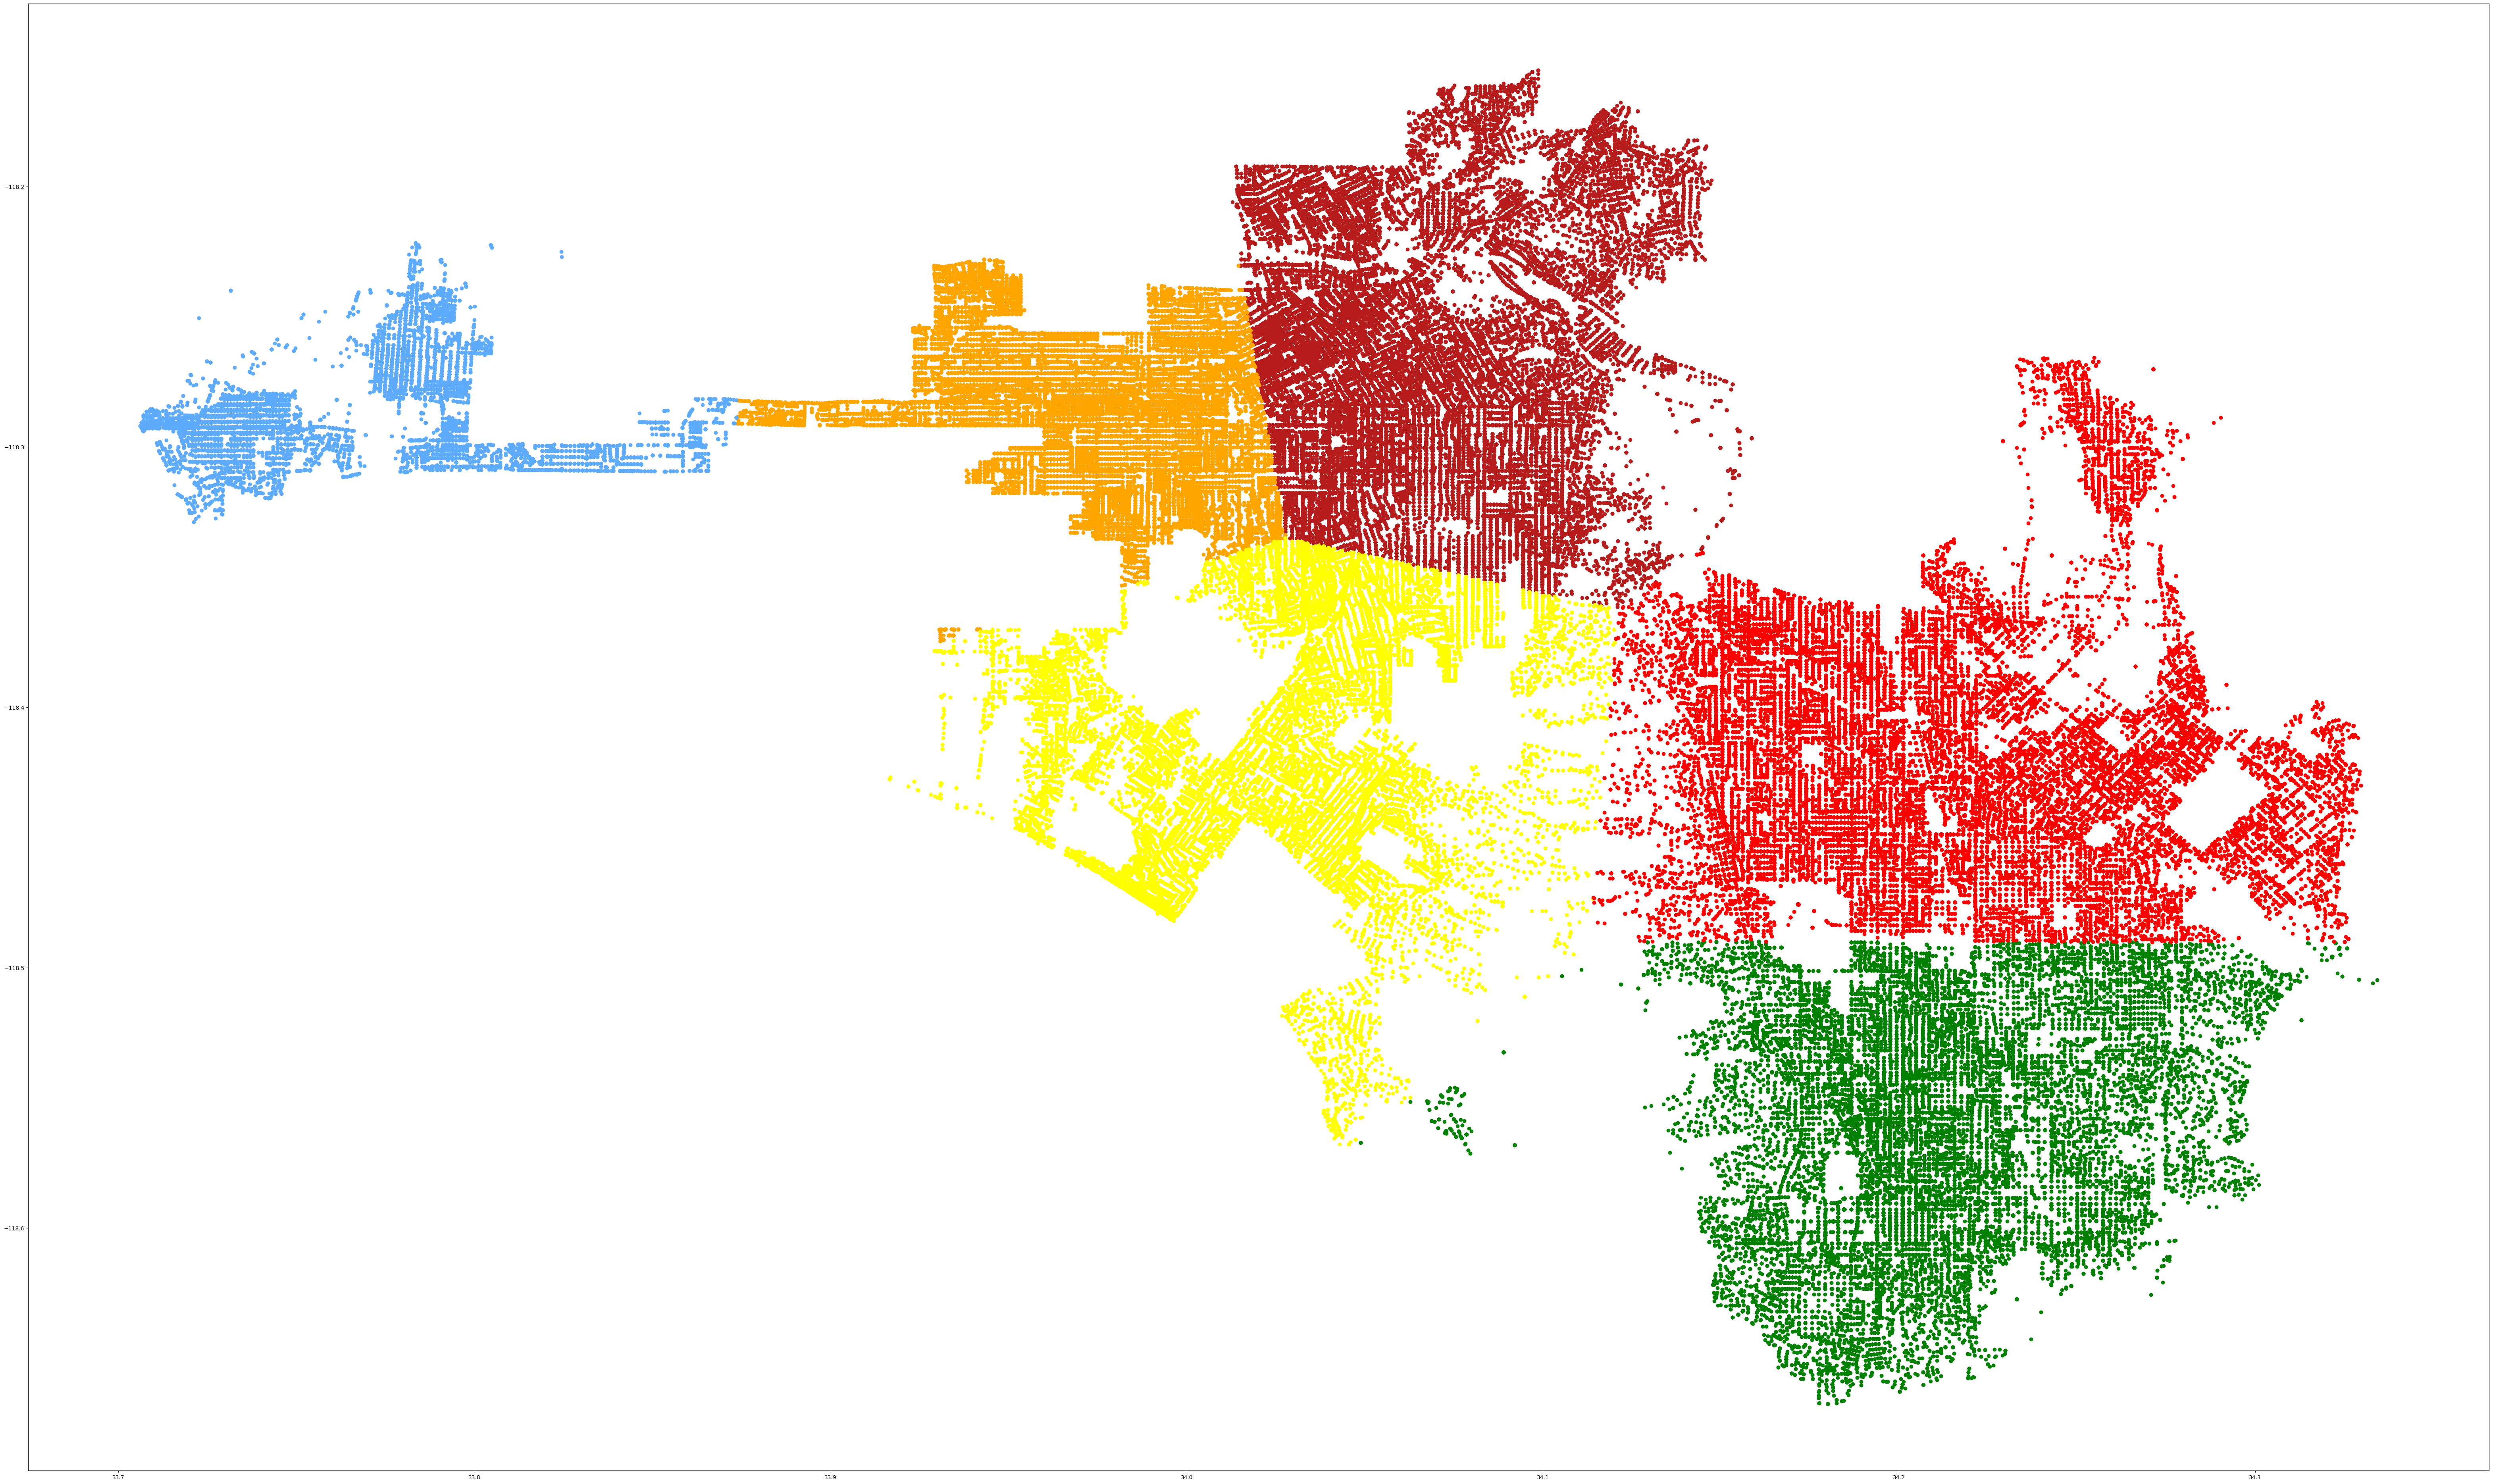

In [82]:
plt.figure(figsize=(80,48))
plt.scatter(cluster1['LAT'],cluster1['LON'],color='#B71C1C')
plt.scatter(cluster2['LAT'],cluster2['LON'],color='green')
plt.scatter(cluster3['LAT'],cluster3['LON'],color='orange')
plt.scatter(cluster4['LAT'],cluster4['LON'],color='yellow')
plt.scatter(cluster5['LAT'],cluster5['LON'],color='#5EABFC')
plt.scatter(cluster6['LAT'],cluster6['LON'],color='red')
plt.show()

***Sorting Clusters based on the Number of Crimes in each***

In [83]:
cluster6['Crime Severity'].sum()

798056

In [84]:
df_clean['Clusters'].value_counts()

Clusters
0    260431
5    133263
2    130142
3    115012
1     84687
4     31340
Name: count, dtype: int64

In [85]:
cluster_counts = df_clean['Clusters'].value_counts().reset_index()
cluster_counts.columns = ['Cluster','Crime Count']

# Crime Score
cluster_counts['Crm Sev Score'] = df_clean.groupby('Clusters')['Crime Severity'].sum()

# sort the cluster count on the basis of number of crimes

cluster_counts = cluster_counts.sort_values('Crm Sev Score', ascending=False)
cluster_counts

,Cluster,Crime Count,Crm Sev Score
0,0,260431,1613754
2,2,130142,844284
5,4,31340,798056
3,3,115012,675218
1,5,133263,501572
4,1,84687,189642


In [86]:
# Create labels for each cluster

labels = ['Extreme','Very High','High','Moderate','Low','Very Low']
cluster_counts['Crime Level'] = labels
cluster_counts

,Cluster,Crime Count,Crm Sev Score,Crime Level
0,0,260431,1613754,Extreme
2,2,130142,844284,Very High
5,4,31340,798056,High
3,3,115012,675218,Moderate
1,5,133263,501572,Low
4,1,84687,189642,Very Low


***Applying Crime Level to each row of our Cleaned DataFrame (df_clean)***

In [87]:
label_map = cluster_counts.set_index('Cluster')['Crime Level'].to_dict()
label_map

{0: 'Extreme',
 2: 'Very High',
 4: 'High',
 3: 'Moderate',
 5: 'Low',
 1: 'Very Low'}

In [88]:
df_clean['Crime Level'] = df_clean['Clusters'].map(label_map)
df_clean

,LAT,LON,DATE OCC,TIME OCC,Crm Cd Desc,AREA NAME,Crime Category,Crime Severity,datetime,Clusters,Crime Level
0,34.0141,-118.2978,2020-01-08,2230,BATTERY - SIMPLE ASSAULT,Southwest,Assault,8,2020-01-08 22:30:00,2,Very High
1,34.0459,-118.2545,2020-01-01,330,BATTERY - SIMPLE ASSAULT,Central,Assault,8,2020-01-01 03:30:00,0,Extreme
2,34.0448,-118.2474,2020-02-13,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,Central,Other,2,2020-02-13 12:00:00,0,Extreme
3,34.1685,-118.4019,2020-01-01,1730,VANDALISM - MISDEAMEANOR ($399 OR UNDER),N Hollywood,Property Crimes,4,2020-01-01 17:30:00,5,Low
4,34.2198,-118.4468,2020-01-01,415,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Mission,Property Crimes,4,2020-01-01 04:15:00,5,Low
...,...,...,...,...,...,...,...,...,...,...,...
757136,34.2466,-118.4054,2023-01-26,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",Foothill,Property Crimes,4,2023-01-26 18:00:00,5,Low
757137,34.2790,-118.4116,2023-03-22,1000,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Foothill,Assault,8,2023-03-22 10:00:00,5,Low
757138,33.9841,-118.2915,2023-04-12,1630,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",77th Street,Assault,8,2023-04-12 16:30:00,2,Very High
757139,34.0467,-118.2485,2023-07-01,1,PICKPOCKET,Central,Theft,6,2023-07-01 00:01:00,0,Extreme


***Using Folium to add interactive Hotspots to the real map of Los Angeles***

In [89]:
import folium

In [90]:
import folium

centroids = kmeans.cluster_centers_
map_center = [34.0522, -118.2437]
crime_map = folium.Map(location=map_center, zoom_start=10)
color_map = {'Extreme': '#D50000', 'Very High': '#C62828', 'High': 'Orange', 'Moderate': '#FFB74D', 'Low': '#5EABFC',
            'Very Low': 'Green'}

# Loop through each row of 'cluster_counts' DataFrame
for i, row in cluster_counts.iterrows():
    cluster_num = row['Cluster']
    crime_level = row['Crime Level']
    crime_count = row['Crime Count']
    centroid_coords = centroids[cluster_num]

    # For Centroid
    folium.Circle(
        location=[centroid_coords[0], centroid_coords[1]],
        radius = 0.00000001 * crime_count,
        color = 'black',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0 
    ).add_to(crime_map)

# Save and display the map
crime_map.save("crime_hotspot_map.html")
crime_map

In [91]:
from scipy.spatial import ConvexHull


# Create a base map, centered on Los Angeles

map_center = [34.0522, -118.2437]
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon


# A list to hold the calculated area and density for each cluster
cluster_metrics = []

# Loop through each cluster to calculate its area and density
for cluster_id in df_clean['Clusters'].unique():
    # Get the points for the current cluster as (Longitude, Latitude) pairs for calculations
    points_for_calc = df_clean[df_clean['Clusters'] == cluster_id][['LON', 'LAT']].values
    
    # Get the crime count from your 'cluster_counts' DataFrame
    crime_count = cluster_counts.loc[cluster_counts['Cluster'] == cluster_id, 'Crime Count'].iloc[0]
     # Get the crime severity score from existing 'cluster_counts' DataFrame
    crime_severity_score = cluster_counts.loc[cluster_counts['Cluster'] == cluster_id, 'Crm Sev Score'].iloc[0]

    # Calculate the convex hull using SciPy
    hull = ConvexHull(points_for_calc)
    hull_points = points_for_calc[hull.vertices]
    
    # Create a Shapely Polygon from the hull points
    hull_polygon = Polygon(hull_points)
    
    # 1. Create a GeoDataFrame, setting the initial CRS to Lat/Lon
    gdf_polygon = gpd.GeoDataFrame(geometry=[hull_polygon], crs="EPSG:4326")
    
    # 2. Project to a local CRS (UTM Zone 11N for Los Angeles) to measure in meters
    gdf_polygon_projected = gdf_polygon.to_crs("EPSG:32611")
    
    # 3. Calculate the area in square kilometers
    area_km2 = gdf_polygon_projected.area.iloc[0] / 1_000_000
    
    # Avoid division by zero for clusters that form a straight line
    if area_km2 < 1e-6: # A very small number threshold
        density = 0
    else:
        density = crime_severity_score / area_km2
    
    # Store the calculated metrics
    cluster_metrics.append({
        'Cluster': cluster_id,
        'Area_km2': area_km2,
        'Density': density
    })

# Create a DataFrame from the metrics and merge it with counts
metrics_df = pd.DataFrame(cluster_metrics)
cluster_counts = pd.merge(cluster_counts, metrics_df, on='Cluster')

# Rank clusters by density and assign the correct Crime Level 
cluster_counts = cluster_counts.sort_values(by='Density', ascending=False).reset_index(drop=True)

# Define the labels in order of rank (highest to lowest)
crime_level_labels = ["Extreme", "Very High", "High", "Moderate", "Low", "Very Low"] 
cluster_counts['Crime Level'] = pd.Series(crime_level_labels[:len(cluster_counts)])

# This ensures the color_map will match the new, correct crime levels
color_map = {
    "Extreme": "#D50000", "Very High": "#C62828", "High": "#F4511E",
    "Moderate": "#FFB74D", "Low": "#5EABFC", "Very Low": "#76C893"
}

print("Updated Cluster Info with Density:")
print(cluster_counts[['Cluster','Crime Count', 'Crm Sev Score', 'Area_km2', 'Density', 'Crime Level']])

Updated Cluster Info with Density:
   Cluster  Crime Count  Crm Sev Score    Area_km2      Density Crime Level
0        0       260431        1613754  241.608266  6679.216835     Extreme
1        4        31340         798056  132.643651  6016.541278   Very High
2        2       130142         844284  162.715469  5188.713819        High
3        3       115012         675218  315.734920  2138.559775    Moderate
4        5       133263         501572  389.010300  1289.354036         Low
5        1        84687         189642  346.166953   547.833923    Very Low


In [92]:
crime_map = folium.Map(location=map_center, zoom_start=10)

# Loop through each unique cluster number
for cluster_id in df_clean['Clusters'].unique():
    # Get all the data points belonging to the current cluster
    points = df_clean[df_clean['Clusters'] == cluster_id][['LAT', 'LON']].values

    # Calculate the convex hull for this cluster's points
    hull = ConvexHull(points)

    # The hull vertices are the points that form the boundary of the shape.
    hull_points = points[hull.vertices]

    # Get the crime level and count for this cluster to use for color and popup
    cluster_info = cluster_counts[cluster_counts['Cluster'] == cluster_id]
    crime_level = cluster_info['Crime Level'].values[0]
    crime_severity_score = cluster_info['Crm Sev Score'].values[0]
    crime_count = cluster_info['Crime Count'].values[0]

    # Draw the hull as a polygon on the map
    folium.Polygon(
        locations=hull_points, # Passing the coordinates of the shape's boundary
        popup=f"Level: {crime_level}<br>Crimes: {crime_count}<br>Severity Score: {crime_severity_score}",
        color=color_map.get(crime_level, 'blue'),
        fill=True,
        fill_opacity=0.3
    ).add_to(crime_map)

# Save and display the map
crime_map.save("crime_hotspot_map.html")
crime_map

In [93]:
import folium

# 1. Define the appearance of the concentric rings
rings = [
    (5000, 0.3),  # Outer ring
    (2200, 0.4),  # Middle ring
    (900, 0.8)    # Inner ring
]

# 2. Create the base map
map_center = [34.0522, -118.2437]
crime_map = folium.Map(location=map_center, zoom_start=10)

# 3. Loop through each hotspot
for i, row in cluster_counts.iterrows():
    cluster_num = row['Cluster']
    crime_level = row['Crime Level']
    crime_count = row['Crime Count']
    crime_severity_score = row['Crm Sev Score']
    density_val = row['Density']
    centroid_coords = centroids[cluster_num]
    
    base_color = color_map.get(crime_level, 'blue')
    
    # Create the base HTML string once per hotspot
    html = f"""
   <h4 style="margin-bottom:5px; font-family: 'Helvetica Neue', sans-serif;">Hotspot {i + 1}</h4>
   <table style="width:100%; font-family: 'Helvetica Neue', sans-serif; font-size: 13px;">
       <tbody>
           <tr>
               <td style="font-weight: bold; padding: 2px;">Crime Level:</td>
               <td style="padding: 2px;">{crime_level}</td>
           </tr>
           <tr>
               <td style="font-weight: bold; padding: 2px;">Crime Count:</td>
               <td style="padding: 2px;">{crime_count}</td>
           </tr>
           <tr>
               <td style="font-weight: bold; padding: 2px;">Total Severity:</td>
               <td style="padding: 2px;">{crime_severity_score:,.0f}</td>
           </tr>
           <tr>
               <td style="font-weight: bold; padding: 2px;">Density:</td>
               <td style="padding: 2px;">{density_val:,.2f} Score/km²</td>
           </tr>
       </tbody>
   </table>
   """
    
    # Loop through all rings
    for radius, opacity in rings:
        # Create a popup object for every single circle.
        # prevents the folium rendering bug.        
        popup = folium.Popup(html, max_width=250)

        folium.Circle(
            location=centroid_coords,
            radius=radius,
            popup=popup,
            color=base_color,
            stroke=False,
            fill=True,
            fill_color=base_color,
            fill_opacity=opacity
        ).add_to(crime_map)


#Create the Legend 

legend_html = f"""
<div style="
    /* This is the key part that makes it float */
    position: fixed; 
    top: 10px;      /* Adjust distance from top */
    right: 10px;    /* Adjust distance from right */

    /* The rest is styling */
    width: 150px;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding-left: 10px;
    ">
    <b>Crime Level</b><br>
"""
for level, color in color_map.items():
    legend_html += f'<i style="background:{color}; opacity: 0.7; width:20px; height:10px; display:inline-block; border: 1px solid grey;"></i> &nbsp; {level}<br>'
legend_html += "</div>"

crime_map.get_root().html.add_child(folium.Element(legend_html))


# Save and display the map
crime_map.save("crime_hotspot_rings_map.html")
crime_map